In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
# Load your datasets
df_prod = pd.read_csv(r"C:\Users\Armstrong\nuclear\data\uranium_production_cleaned.csv")
df_gen  = pd.read_csv(r"C:\Users\Armstrong\nuclear\data\nuclear_generation_by_country.csv")

# Rename the production column for clarity
df_gen = df_gen.rename(columns={
    'Nuclear electricity  production (billion kWh)2022': "Production_TWh_2022"
})




C:\Users\Armstrong\AppData\Local\Temp\ipykernel_23072\2860711932.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_top10["Country"], rotation=45, ha='right')
C:\Users\Armstrong\AppData\Local\Temp\ipykernel_23072\2860711932.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_top10["Country"], rotation=45, ha='right')


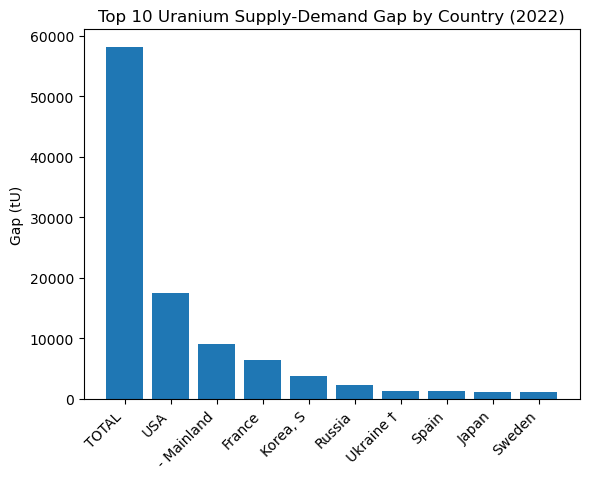

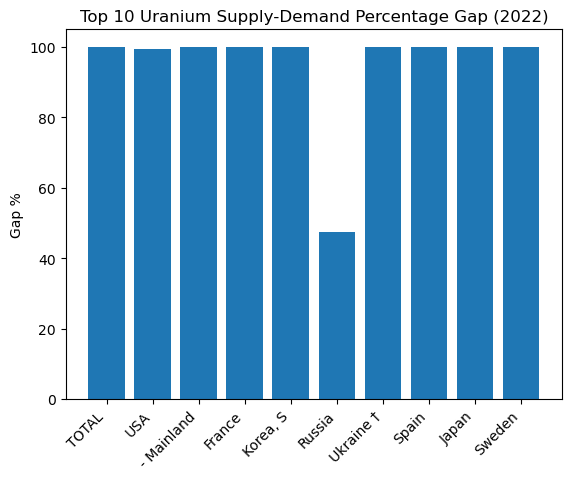

In [21]:
# Compute uranium demand (tU) for 2022 (200 tU per GWe-year; 1 GWe-year = 8.76 TWh)
tU_per_TWh = 200 / 8.76
df_gen["Demand_tU_2022"] = df_gen["Production_TWh_2022"] * tU_per_TWh

# Prepare supply data
df_prod.columns = df_prod.columns.str.strip()
df_prod["Supply_tU_2022"] = df_prod["2022"]

# Merge supply and demand
df_gap = pd.merge(
    df_gen[["Country", "Demand_tU_2022"]],
    df_prod[["Country", "Supply_tU_2022"]],
    on="Country",
    how="left"
).fillna(0)

# Calculate gap metrics
df_gap["Gap_tU_2022"] = df_gap["Demand_tU_2022"] - df_gap["Supply_tU_2022"]
df_gap["Gap_pct_2022"] = df_gap["Gap_tU_2022"] / df_gap["Demand_tU_2022"] * 100

# Select top 10 countries by absolute gap
df_top10 = df_gap.sort_values("Gap_tU_2022", ascending=False).head(10)

# Plot absolute gap
fig1, ax1 = plt.subplots()
ax1.bar(df_top10["Country"], df_top10["Gap_tU_2022"])
ax1.set_xticklabels(df_top10["Country"], rotation=45, ha='right')
ax1.set_ylabel("Gap (tU)")
ax1.set_title("Top 10 Uranium Supply-Demand Gap by Country (2022)")

# Plot percentage gap
fig2, ax2 = plt.subplots()
ax2.bar(df_top10["Country"], df_top10["Gap_pct_2022"])
ax2.set_xticklabels(df_top10["Country"], rotation=45, ha='right')
ax2.set_ylabel("Gap %")
ax2.set_title("Top 10 Uranium Supply-Demand Percentage Gap (2022)")

plt.show()